# Scikit-Learn のニューラルネットワーク

Scikit-Learn の2層ニューラルネットワークでIrisを3種に分類。

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl)
    plt.legend(loc='upper left')
    plt.show()

### Irisデータセット

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

iris = sns.load_dataset('iris')

X = iris[['sepal_length', 'petal_length']]
Y = iris['species'].map(lambda x: 0 if x == 'setosa' else 1 if x == 'versicolor' else 2)

sc = StandardScaler()
X_std = sc.fit_transform(X)

# 教師データとテストデータに分割
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.3, random_state=1)

### ニューラルネットワークの作成・学習

In [3]:
from sklearn.neural_network import MLPClassifier
# Multi-layer Perceptron classifier
# - max_iter: 
# - hidden_layer_sizes: 隠れ層のニューロン数、多層にする場合は各層のニューロン数を指定 eg. [4, 4]
model = MLPClassifier(max_iter=4000, hidden_layer_sizes=[4])
#
model.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=[4], max_iter=4000)

### 分類の境界

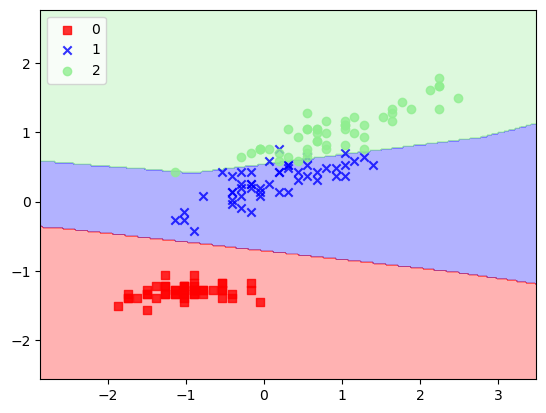

In [4]:
plot_decision_regions(X_std, Y, classifier=model)

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

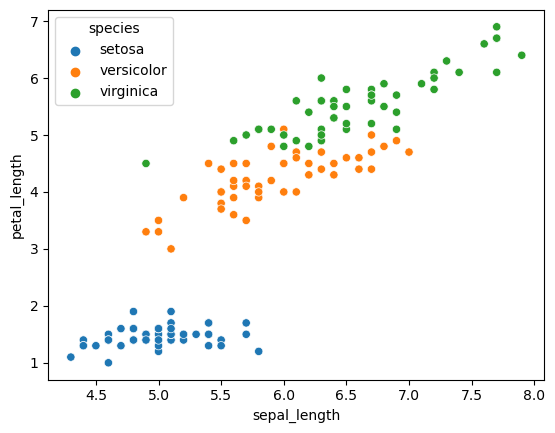

In [5]:
# 散布図と比較
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', hue='species')

### 分類精度

- 正確度の表示
- 混同行列の可視化

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        14
           1      1.000     0.944     0.971        18
           2      0.929     1.000     0.963        13

    accuracy                          0.978        45
   macro avg      0.976     0.981     0.978        45
weighted avg      0.979     0.978     0.978        45



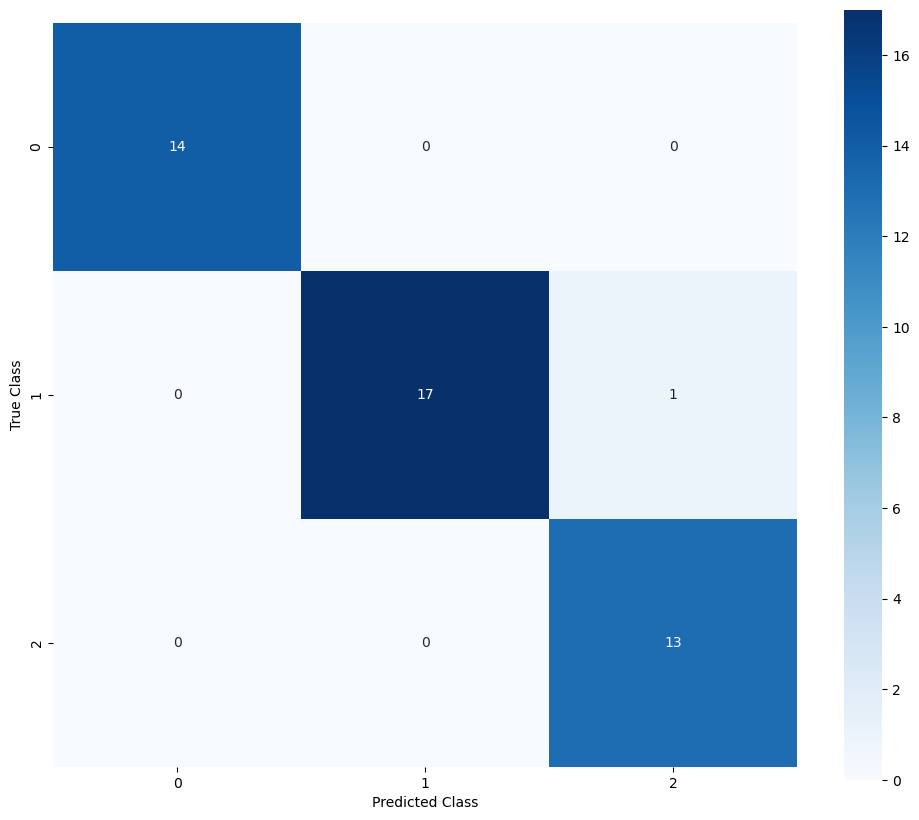

In [6]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# テストデータについてモデルからの予測値を計算
Y_predict = model.predict(X_test)
# 結果の表示
print(classification_report(Y_test, Y_predict, digits=3))
# 混同行列の可視化
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(Y_test, Y_predict),
            square=True, cbar=True, annot=True, cmap='Blues')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()